In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()  # Set Seaborn's default style
from matplotlib import pyplot as plt
%matplotlib inline 

data = pd.read_csv('data/car_data.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
len(data)

11914

In [5]:
len(data.columns)

16

In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Data Cleaning and Preprocessing

In [8]:
# Clean column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Clean values within specific columns of the DataFrame
string_columns = list(data.dtypes[data.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')
    data[col] = data[col].str.strip()  # Remove leading/trailing whitespace

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [9]:
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [10]:
data.rename(columns = {'msrp': 'price'}, inplace = True)
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [11]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [12]:
data.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


###  Price Distribution Analysis

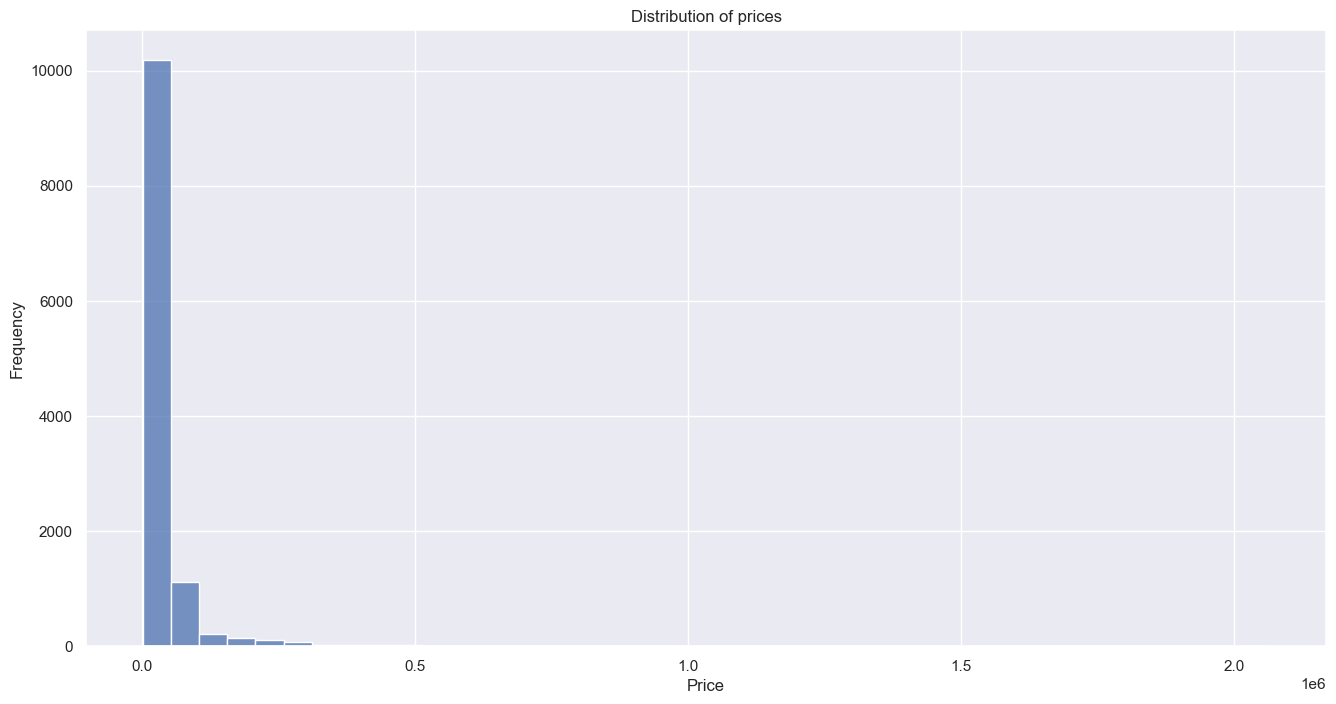

In [13]:
plt.figure(figsize=(16, 8))
sns.histplot(data['price'], bins=40)
plt.title('Distribution of prices')
plt.ylabel('Frequency')
plt.xlabel('Price')

plt.show()

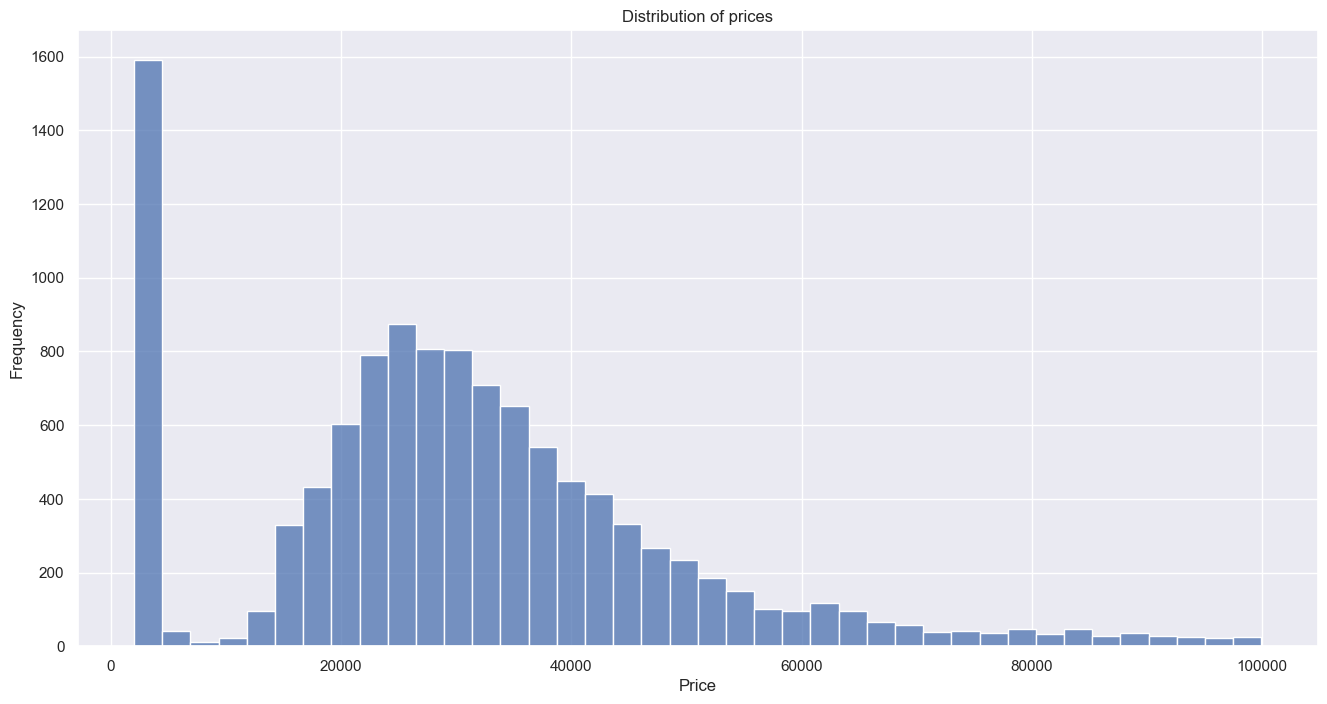

In [14]:
plt.figure(figsize=(16, 8))

sns.histplot(data.price[data.price < 100000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

### Log-transformed Price Distribution

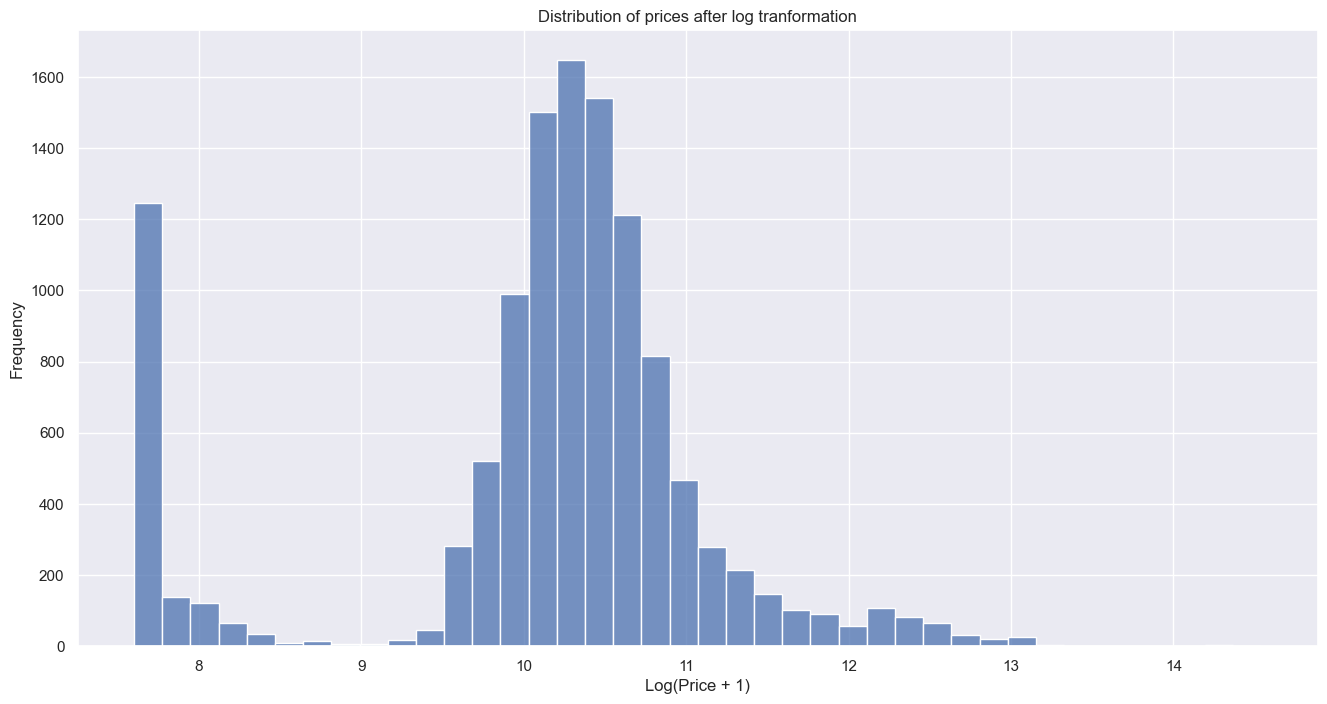

In [15]:
# Log-transformed price distribution
data['log_price'] = np.log1p(data.price)

plt.figure(figsize=(16, 8))

sns.histplot(data.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [16]:
data['price'].skew()

11.771987129334972

In [17]:
data['log_price'].skew()

-0.9178678067039072

In [18]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

In [19]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### Check for missing values in the dataset

In [20]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

### Check categorical columns

In [21]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### Count occurrences of each car make in the dataset

In [22]:
data.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [23]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price                  int64
log_price            float64
dtype: object

### Group by 'make' and calculate mean for numeric columns

In [24]:
data.groupby('make').mean(numeric_only=True)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
make,,,,,,,,,
acura,"2,010.06",244.80,5.33,3.62,28.11,19.94,204.00,"34,887.59",10.14
alfa_romeo,"2,015.40",237.00,4.00,2.00,34.00,24.00,113.00,"61,600.00",11.02
aston_martin,"2,013.02",484.32,10.62,2.15,18.89,12.53,259.00,"197,910.38",12.14
audi,"2,012.23",277.70,5.56,3.47,28.82,19.59,"3,105.00","53,452.11",10.48
bentley,"2,011.70",533.85,9.73,2.68,18.91,11.55,520.00,"247,169.32",12.40
bmw,"2,014.35",326.91,5.96,3.16,29.25,20.74,"3,916.00","61,546.76",10.91
bugatti,"2,008.33","1,001.00",16.00,2.00,14.00,8.00,820.00,"1,757,223.67",14.37
buick,"2,010.01",219.24,5.32,3.84,26.95,18.70,155.00,"28,206.61",9.96
cadillac,"2,013.15",332.31,6.43,3.60,25.24,17.36,"1,624.00","56,231.32",10.81


### Mean price of each car make in the dataset

In [25]:
data.groupby('make').mean(numeric_only=True)['price']

make
acura              34,887.59
alfa_romeo         61,600.00
aston_martin      197,910.38
audi               53,452.11
bentley           247,169.32
bmw                61,546.76
bugatti         1,757,223.67
buick              28,206.61
cadillac           56,231.32
chevrolet          28,350.39
chrysler           26,722.96
dodge              22,390.06
ferrari           238,218.84
fiat               22,670.24
ford               27,399.27
genesis            46,616.67
gmc                30,493.30
honda              26,674.34
hummer             36,464.41
hyundai            24,597.04
infiniti           42,394.21
kia                25,310.17
lamborghini       331,567.31
land_rover         67,823.22
lexus              47,549.07
lincoln            42,839.83
lotus              69,188.28
maserati          114,207.71
maybach           546,221.88
mazda              20,039.38
mclaren           239,805.00
mercedes-benz      71,476.23
mitsubishi         21,240.54
nissan             28,583.43
oldsmobil

### Filter data for cars manufactured in 2012 or later and calculate mean price

In [26]:
data[data['year'] >= 2012]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
5,bmw,1_series,2012,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,31200,10.35
6,bmw,1_series,2012,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,26,17,3916,44100,10.69
7,bmw,1_series,2012,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,39300,10.58
8,bmw,1_series,2012,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,36900,10.52
9,bmw,1_series,2013,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,27,18,3916,37200,10.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11902,bmw,z4,2016,premium_unleaded_(required),335.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,66350,11.10
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83


In [27]:
data[data['year'] >= 2012]['price'].mean()

47958.47976011994

### Filter data for cars manufactured before 2012 and calculate mean price

In [28]:
data[data['year'] < 2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.84


In [29]:
data[data['year'] < 2015]['price'].mean()

35457.18770062511

### Overall average price of cars

In [30]:
data['price'].mean()

40594.737032063116

### Compare average prices by year

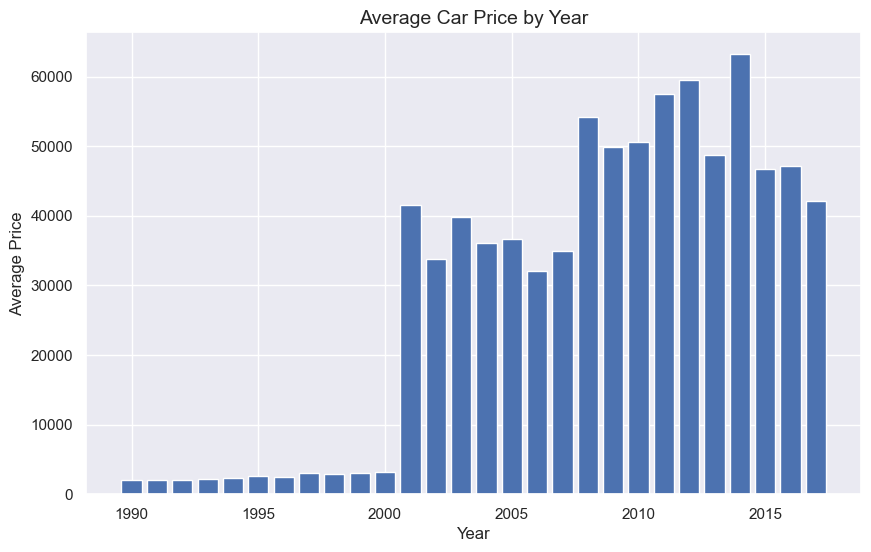

In [31]:
yearly_avg_prices = data.groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_prices.index, yearly_avg_prices.values)
plt.title("Average Car Price by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

### Compare price distribution for cars before and after 2012

In [32]:
print("Price Range:", data['price'].min(), "-", data['price'].max())

Price Range: 2000 - 2065902


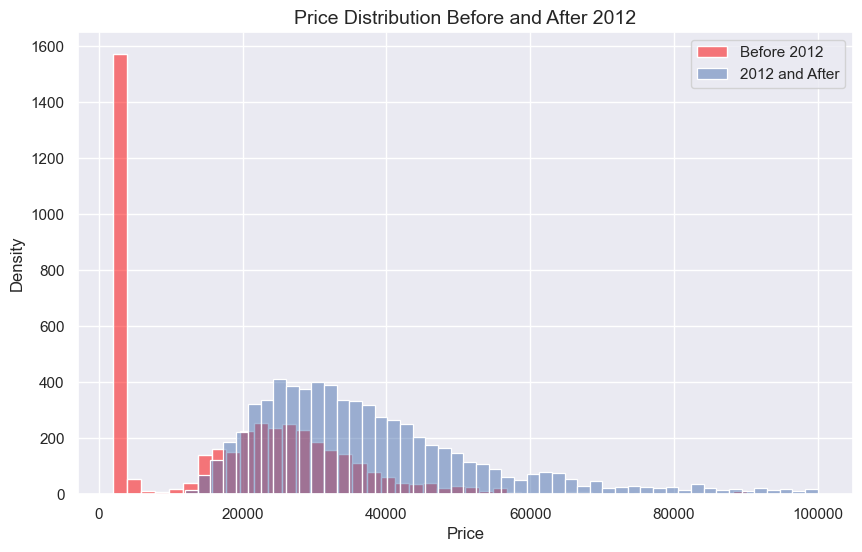

In [33]:
filtered_data_old = data[(data['price'] < 100000) & (data['year'] < 2012)]
filtered_data_recent = data[(data['price'] < 100000) & (data['year'] >= 2012)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_old['price'] , bins=50, alpha=0.5, label='Before 2012', color='red')
sns.histplot(filtered_data_recent['price'] , bins=50, alpha=0.5, label='2012 and After')
plt.title("Price Distribution Before and After 2012", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show() 

### Split the data into training, validation, and testing sets

In [34]:
from sklearn.model_selection import train_test_split

data_train_val, data_test = train_test_split(data, test_size=0.2, random_state=2)
data_train, data_val = train_test_split(data_train_val, test_size=0.25, random_state=2)  # 0.25 x 0.8 = 0.2

data_train = data_train.copy()
data_val = data_val.copy()
data_test = data_test.copy()

print(f"Train size: {data_train.shape}, Validation size: {data_val.shape}, Test size: {data_test.shape}")

Train size: (7148, 17), Validation size: (2383, 17), Test size: (2383, 17)


In [35]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
9746,hyundai,sonata,2017,regular_unleaded,185.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,36,25,1439,23400,10.06
2871,bentley,continental_gt,2016,premium_unleaded_(required),500.00,8.00,automatic,all_wheel_drive,2.00,"exotic,luxury,high-performance",midsize,coupe,25,15,520,198500,12.20
11758,nissan,xterra,2015,regular_unleaded,261.00,6.00,manual,four_wheel_drive,4.00,NaN,midsize,4dr_suv,20,15,2009,26670,10.19
9228,toyota,sienna,2016,regular_unleaded,266.00,6.00,automatic,front_wheel_drive,4.00,NaN,large,passenger_minivan,25,18,2031,41900,10.64
1134,audi,a8,2016,premium_unleaded_(required),333.00,6.00,automatic,all_wheel_drive,4.00,"luxury,performance",large,sedan,28,18,3105,81500,11.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,acura,tl,2014,premium_unleaded_(recommended),305.00,6.00,automatic,all_wheel_drive,4.00,"luxury,performance",midsize,sedan,26,18,204,39580,10.59
2137,volkswagen,cabrio,2002,regular_unleaded,115.00,4.00,automatic,front_wheel_drive,2.00,NaN,compact,convertible,27,20,873,23175,10.05
1060,audi,a3,2017,premium_unleaded_(recommended),220.00,4.00,automated_manual,all_wheel_drive,4.00,luxury,compact,sedan,35,26,3105,34200,10.44
2124,volkswagen,cabriolet,1992,regular_unleaded,94.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,convertible,29,22,873,2000,7.60


In [36]:
y_train = data_train.log_price.values
y_val = data_val.log_price.values
y_test = data_test.log_price.values

### Define the base features for the model (Numerical only)

In [37]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [38]:
data[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


### Handle Missing Values

In [39]:
data[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [40]:
def prepare_X(data):
    data_num = data[base]
    data_num = data_num.fillna(data_num.mean())
    X = data_num.values
    return X

# Linear Regression

In [41]:
numeric_data_train = data_train.select_dtypes(include=[np.number])
numeric_data_train.corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
year,1.00,0.35,-0.04,0.26,0.25,0.20,0.08,0.26,0.77
engine_hp,0.35,1.00,0.78,-0.10,-0.39,-0.47,0.04,0.71,0.68
engine_cylinders,-0.04,0.78,1.00,-0.14,-0.60,-0.61,0.05,0.55,0.35
number_of_doors,0.26,-0.10,-0.14,1.00,0.11,0.12,-0.04,-0.14,0.10
highway_mpg,0.25,-0.39,-0.60,0.11,1.00,0.86,-0.02,-0.16,-0.01
city_mpg,0.20,-0.47,-0.61,0.12,0.86,1.00,-0.01,-0.17,-0.03
popularity,0.08,0.04,0.05,-0.04,-0.02,-0.01,1.00,-0.04,0.01
price,0.26,0.71,0.55,-0.14,-0.16,-0.17,-0.04,1.00,0.64
log_price,0.77,0.68,0.35,0.10,-0.01,-0.03,0.01,0.64,1.00


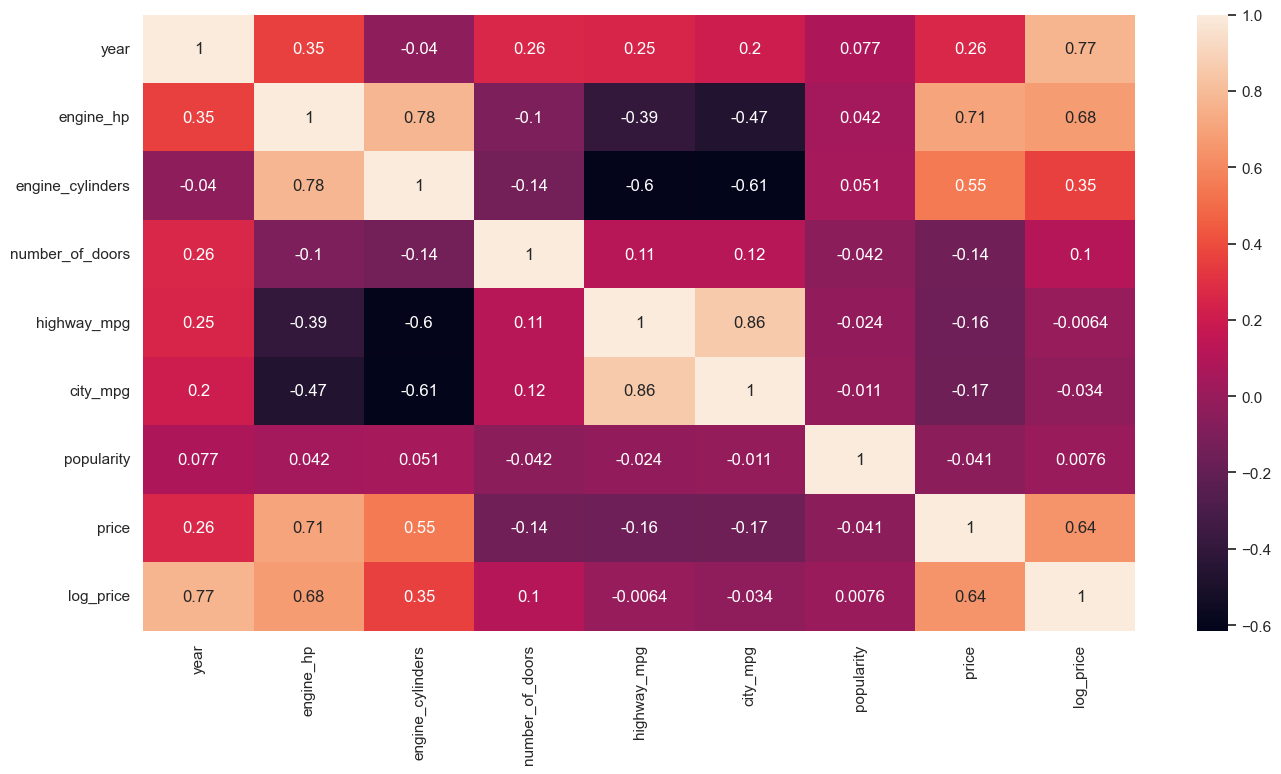

In [42]:
plt.figure(figsize=(16, 8))
_ = sns.heatmap(numeric_data_train.corr(), annot=True)
plt.show()

### Train Linear Regression Model (Normal Equation)

In [43]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]  

In [44]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)    
y_pred = w_0 + X_train.dot(w)

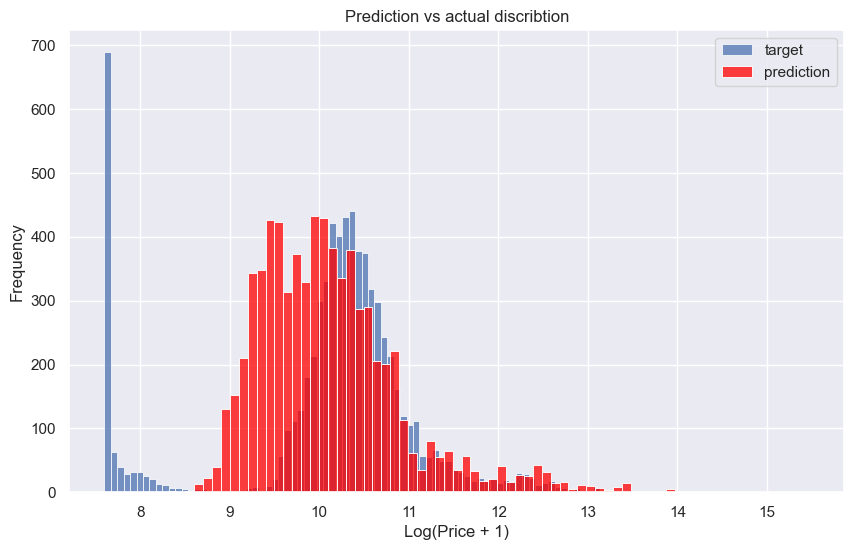

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train , label= 'target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Prediction vs actual discribtion')

plt.show()

### Calculate Root Mean Squared Error (RMSE) to evaluate model performance

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

0.7569184991814157

In [48]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7450684005759727

### Feature Engineering

In [49]:
sorted(data.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [50]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()

    # Adding 'age' as a feature
    data['age'] = 2017 - data.year
    features.append('age')

    # Add fuel efficiency ratio (highway/city MPG)
    data['efficiency_ratio'] = data['highway_mpg'] / data['city_mpg']
    features.append('efficiency_ratio')

    # Add engine weight ratio
    data['engine_weight_ratio'] = data['engine_hp'] / data['highway_mpg']
    features.append('engine_weight_ratio')

    # Add is_luxury indicator (1 if engine_hp > 300, else 0)
    data['is_luxury'] = (data['engine_hp'] > 300).astype(int)
    features.append('is_luxury')

    # Add luxury fuel efficiency
    data['luxury_efficiency'] = data['efficiency_ratio'] * data['is_luxury']
    features.append('luxury_efficiency')

    # Add performance decline feature (engine_hp divided by age)
    data['performance_decline'] = data['engine_hp'] / data['age']
    # Handle division by zero: if age is 0, set performance_decline to 0
    data.loc[data['age'] == 0, 'performance_decline'] = 0
    features.append('performance_decline')

    # Handling missing values
    data_num = data[features]
    data_num = data_num.fillna(data_num.mean())

    # Convert DataFrame to NumPy array for computation
    X = data_num.values
    return X

In [51]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train) 
y_pred = w_0 + X_train.dot(w)  
print('Train RMSE:', rmse(y_train, y_pred)) 

Train RMSE: 0.49139118014661354


In [52]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE', rmse(y_val, y_pred))

Validation RMSE 0.49503443605414066


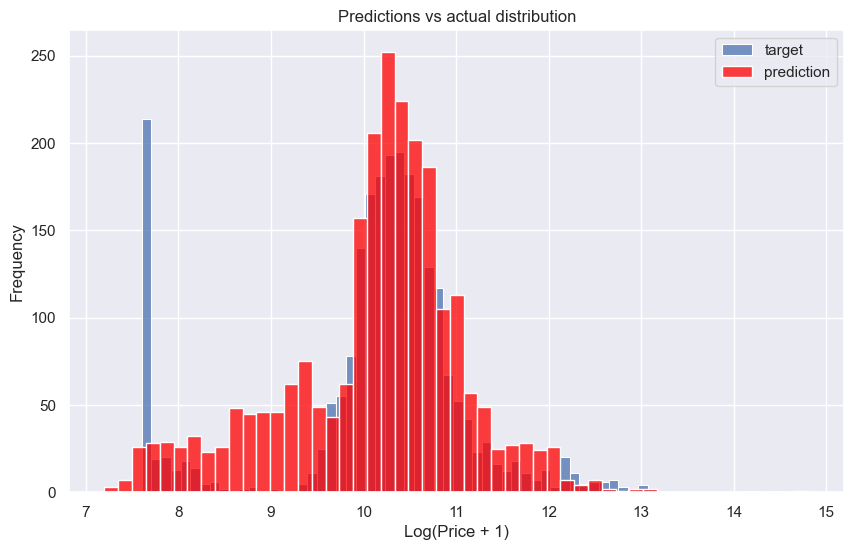

In [53]:
plt.figure(figsize=(10, 6))


sns.histplot(y_val, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Handling Categorical Data

In [54]:
data.number_of_doors.value_counts()

number_of_doors
4.00    8353
2.00    3160
3.00     395
Name: count, dtype: int64

In [55]:
data['make'].value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [56]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()

    # Adding 'age' as a feature
    data['age'] = 2017 - data.year
    features.append('age')

    # Add fuel efficiency ratio (highway/city MPG)
    data['efficiency_ratio'] = data['highway_mpg'] / data['city_mpg']
    features.append('efficiency_ratio')

    # Add engine weight ratio
    data['engine_weight_ratio'] = data['engine_hp'] / data['highway_mpg']
    features.append('engine_weight_ratio')

    # Add is_luxury indicator (1 if engine_hp > 300, else 0)
    data['is_luxury'] = (data['engine_hp'] > 300).astype(int)
    features.append('is_luxury')

    # Add luxury fuel efficiency
    data['luxury_efficiency'] = data['efficiency_ratio'] * data['is_luxury']
    features.append('luxury_efficiency')

    # Add performance decline feature (engine_hp divided by age)
    data['performance_decline'] = data['engine_hp'] / data['age']
    # Handle division by zero: if age is 0, set performance_decline to 0
    data.loc[data['age'] == 0, 'performance_decline'] = 0
    features.append('performance_decline')

    # perform one-hot encoding for 'number_of_doors' feature
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)

    # Encode 'make' feature using target encoding
    make_avg_price = data.groupby('make')['log_price'].mean()
    data['make_encoded'] = data['make'].map(make_avg_price)
    features.append('make_encoded')
    
    # Handling missing values
    data_num = data[features]
    data_num = data_num.fillna(data_num.mean())

    # Convert DataFrame to NumPy array for computation
    X = data_num.values
    return X

In [57]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

train: 0.4581194598364154


In [58]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4612632205858987


In [59]:
data['engine_fuel_type'].value_counts()

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [60]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()

    # Adding 'age' as a feature
    data['age'] = 2017 - data.year
    features.append('age')

    # Add fuel efficiency ratio (highway/city MPG)
    data['efficiency_ratio'] = data['highway_mpg'] / data['city_mpg']
    features.append('efficiency_ratio')

    # Add engine weight ratio
    data['engine_weight_ratio'] = data['engine_hp'] / data['highway_mpg']
    features.append('engine_weight_ratio')

    # Add is_luxury indicator (1 if engine_hp > 300, else 0)
    data['is_luxury'] = (data['engine_hp'] > 300).astype(int)
    features.append('is_luxury')

    # Add luxury fuel efficiency
    data['luxury_efficiency'] = data['efficiency_ratio'] * data['is_luxury']
    features.append('luxury_efficiency')

    # Add performance decline feature (engine_hp divided by age)
    data['performance_decline'] = data['engine_hp'] / data['age']
    # Handle division by zero: if age is 0, set performance_decline to 0
    data.loc[data['age'] == 0, 'performance_decline'] = 0
    features.append('performance_decline')

    # perform one-hot encoding for 'number_of_doors' feature
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)

    # Encode 'make' feature using target encoding
    make_avg_price = data.groupby('make')['log_price'].mean()
    data['make_encoded'] = data['make'].map(make_avg_price)
    features.append('make_encoded')

    # Target encoding for 'engine_fuel_type'
    fuel_type_avg_price = data.groupby('engine_fuel_type')['log_price'].mean()
    data['fuel_type_encoded'] = data['engine_fuel_type'].map(fuel_type_avg_price)
    features.append('fuel_type_encoded')
    
    # Handling missing values
    data_num = data[features]
    data_num = data_num.fillna(data_num.mean())

    # Convert DataFrame to NumPy array for computation
    X = data_num.values
    return X

In [61]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

train: 0.44647566308864717


In [62]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.44998779279838286


In [63]:
data['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [64]:
data['driven_wheels'].value_counts()

driven_wheels
front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: count, dtype: int64

In [65]:
data['market_category'].value_counts()

market_category
crossover                                          1110
flex_fuel                                           872
luxury                                              855
luxury,performance                                  673
hatchback                                           641
                                                   ... 
crossover,exotic,luxury,performance                   1
exotic,luxury,high-performance,hybrid                 1
crossover,exotic,luxury,high-performance              1
flex_fuel,factory_tuner,luxury,high-performance       1
performance,hybrid                                    1
Name: count, Length: 71, dtype: int64

In [66]:
data['vehicle_size'].value_counts()

vehicle_size
compact    4764
midsize    4373
large      2777
Name: count, dtype: int64

In [67]:
data['vehicle_style'].value_counts()

vehicle_style
sedan                  3048
4dr_suv                2488
coupe                  1211
convertible             793
4dr_hatchback           702
crew_cab_pickup         681
extended_cab_pickup     623
wagon                   592
2dr_hatchback           506
passenger_minivan       417
regular_cab_pickup      392
2dr_suv                 138
passenger_van           128
cargo_van                95
cargo_minivan            71
convertible_suv          29
Name: count, dtype: int64

In [68]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()

    # Adding 'age' as a feature
    data['age'] = 2017 - data.year
    features.append('age')

    # Add fuel efficiency ratio (highway/city MPG)
    data['efficiency_ratio'] = data['highway_mpg'] / data['city_mpg']
    features.append('efficiency_ratio')

    # Add engine weight ratio
    data['engine_weight_ratio'] = data['engine_hp'] / data['highway_mpg']
    features.append('engine_weight_ratio')

    # Add is_luxury indicator (1 if engine_hp > 300, else 0)
    data['is_luxury'] = (data['engine_hp'] > 300).astype(int)
    features.append('is_luxury')

    # Add luxury fuel efficiency
    data['luxury_efficiency'] = data['efficiency_ratio'] * data['is_luxury']
    features.append('luxury_efficiency')

    # Add performance decline feature (engine_hp divided by age)
    data['performance_decline'] = data['engine_hp'] / data['age']
    # Handle division by zero: if age is 0, set performance_decline to 0
    data.loc[data['age'] == 0, 'performance_decline'] = 0
    features.append('performance_decline')

    # perform one-hot encoding for 'number_of_doors' feature
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)
    
    # Encode 'make' feature using target encoding
    make_avg_price = data.groupby('make')['log_price'].mean()
    data['make_encoded'] = data['make'].map(make_avg_price)
    features.append('make_encoded')

    # Target encoding for 'engine_fuel_type'
    fuel_type_avg_price = data.groupby('engine_fuel_type')['log_price'].mean()
    data['fuel_type_encoded'] = data['engine_fuel_type'].map(fuel_type_avg_price)
    features.append('fuel_type_encoded')

    # Target encoding for 'transmission_type'
    transmission_avg_price = data.groupby('transmission_type')['log_price'].mean()
    data['transmission_encoded'] = data['transmission_type'].map(transmission_avg_price)
    features.append('transmission_encoded')

    # Target encoding for 'driven_wheels'
    wheels_avg_price = data.groupby('driven_wheels')['log_price'].mean()
    data['wheels_encoded'] = data['driven_wheels'].map(wheels_avg_price)
    features.append('wheels_encoded')

    # Target encoding for 'market_category'
    market_avg_price = data.groupby('market_category')['log_price'].mean()
    data['market_encoded'] = data['market_category'].map(market_avg_price)
    features.append('market_encoded')

    # Target encoding for 'vehicle_size'
    size_avg_price = data.groupby('vehicle_size')['log_price'].mean()
    data['size_encoded'] = data['vehicle_size'].map(size_avg_price)
    features.append('size_encoded')

    # Target encoding for 'vehicle_style'
    style_avg_price = data.groupby('vehicle_style')['log_price'].mean()
    data['style_encoded'] = data['vehicle_style'].map(style_avg_price)
    features.append('style_encoded')
    
    # Handling missing values
    data_num = data[features]
    data_num = data_num.fillna(data_num.mean())

    # Convert DataFrame to NumPy array for computation
    X = data_num.values
    return X

In [69]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

train: 0.43009668906533133


In [70]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.43848618165755116


### L2 Regularization (Ridge Regression)

In [96]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [97]:
X_train = prepare_X(data_train)

In [98]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[7], w[15]))

    0, 1.86, 0.04, 0.22
0.001, 1.86, 0.04, 0.22
 0.01, 1.84, 0.04, 0.22
  0.1, 1.63, 0.04, 0.23
    1, 0.79, 0.04, 0.23
   10, 0.15, 0.04, 0.23


In [99]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

train: 0.4300967945947212


In [100]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

val 0.4384887013448589


In [101]:
X_train = prepare_X(data_train)
X_val = prepare_X(data_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 0, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4384861819083885
0.0001 0.4384862067045219
 0.001 0.43848643226985007
  0.01 0.4384887013448589
   0.1 0.43851205547366057
     0 0.43848618165755116
     1 0.43868304879050807
     5 0.43897476345106956
    10 0.43924700112734


In [102]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

In [103]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4384862067045219


In [104]:
X_test = prepare_X(data_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))  

test: 0.439813178790554


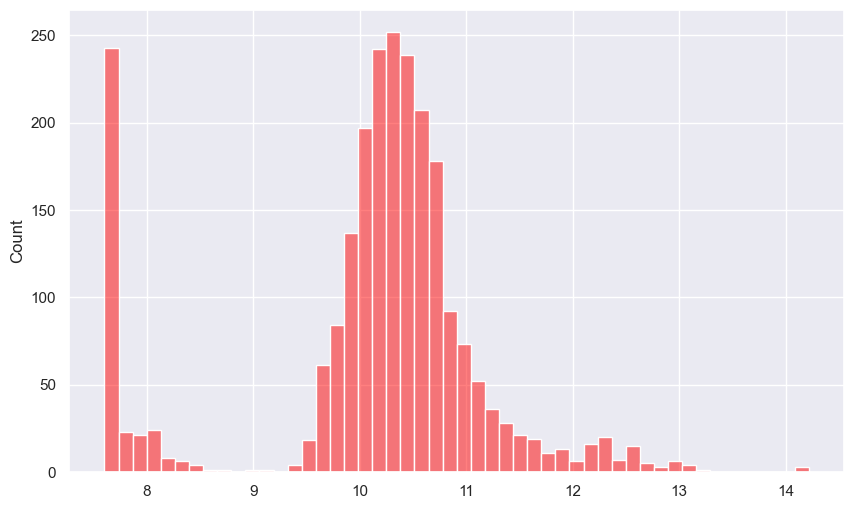

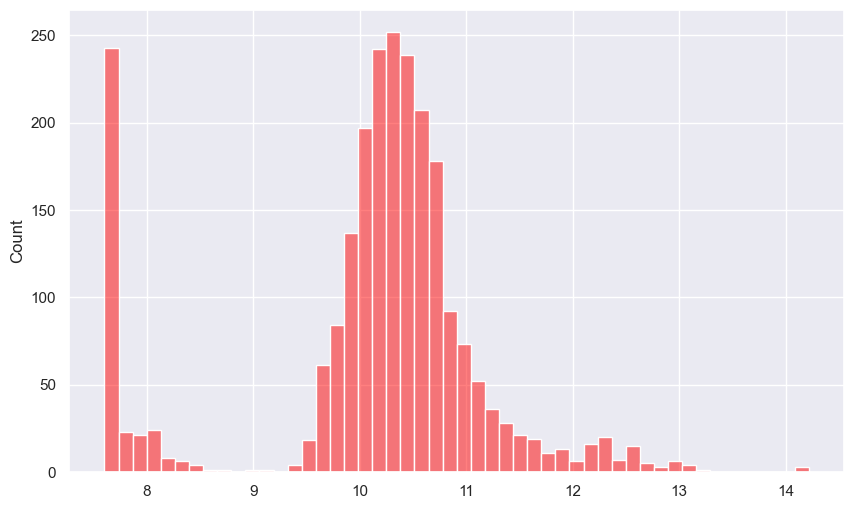

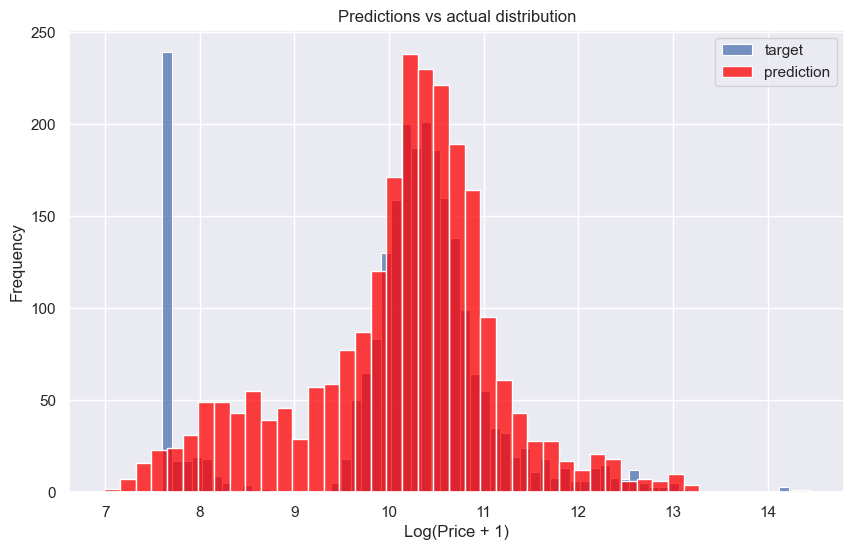

In [105]:
plt.figure(figsize=(10, 6))


sns.histplot(y_test, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Predict Used Car Price

In [106]:
def predict_price(car_data):
    
    # Prepare data for prediction
    X_test = prepare_X(pd.DataFrame([car_data]))

    # Predict price
    y_pred = w_0 + X_test.dot(w)
    suggestion = np.expm1(y_pred)

    return suggestion

In [107]:
i = 7
car_info = data_test.iloc[i].to_dict()
print(f"Car information:\n{car_info}")

Car information:
{'make': 'bmw', 'model': '6_series', 'year': 2015, 'engine_fuel_type': 'premium_unleaded_(required)', 'engine_hp': 315.0, 'engine_cylinders': 6.0, 'transmission_type': 'automatic', 'driven_wheels': 'rear_wheel_drive', 'number_of_doors': 2.0, 'market_category': 'luxury,performance', 'vehicle_size': 'midsize', 'vehicle_style': 'coupe', 'highway_mpg': 32, 'city_mpg': 21, 'popularity': 3916, 'price': 76100, 'log_price': 11.239816684367907}


In [108]:
predicted_price = predict_price(car_info)
print(f"Predicted price for the car: ${predicted_price[0]:.2f}")

Predicted price for the car: $74403.12


### Evaluate Model Performance using RMSE and Relative RMSE

In [109]:
from sklearn.metrics import mean_squared_error

def evaluate_model(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    relative_rmse = (rmse / np.mean(y)) * 100
    return rmse, relative_rmse

In [110]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

In [111]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
rmse_lr , relative_rmse_lr = evaluate_model(y_val, y_pred)
print(f"Validation:: RMSE: {rmse_lr:.4f}, Relative RMSE: {relative_rmse_lr:.2f}%")

Validation:: RMSE: 0.4385, Relative RMSE: 4.33%


In [112]:
X_test = prepare_X(data_test)
y_pred = w_0 + X_test.dot(w)
rmse_lr , relative_rmse_lr = evaluate_model(y_test, y_pred)
print(f"Test: RMSE: {rmse_lr:.4f}, Relative RMSE: {relative_rmse_lr:.2f}%")

Test: RMSE: 0.4398, Relative RMSE: 4.35%


# Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [114]:
rmse_rf, relative_rmse_rf = evaluate_model(y_test, y_pred_rf)
print(f"Test: RMSE: {rmse_rf:.4f}, Relative RMSE: {relative_rmse_rf:.2f}%")

Test: RMSE: 0.1547, Relative RMSE: 1.53%


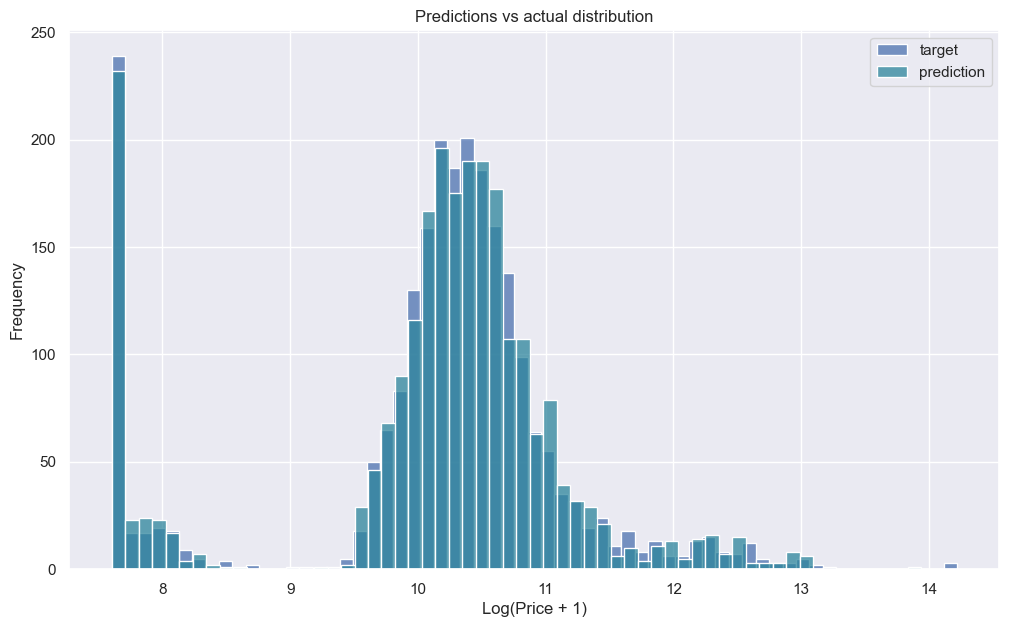

In [115]:
plt.figure(figsize=(12, 7))


sns.histplot(y_test, label='target')
sns.histplot(y_pred_rf, label='prediction', color='#2D859C')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# Gradient Boosting XGBoost

In [116]:
!pip install xgboost

In [118]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [119]:
rmse_xgb, relative_rmse_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"Test: RMSE: {rmse_xgb:.4f}, Relative RMSE: {relative_rmse_xgb:.2f}%")

Test: RMSE: 0.1542, Relative RMSE: 1.52%


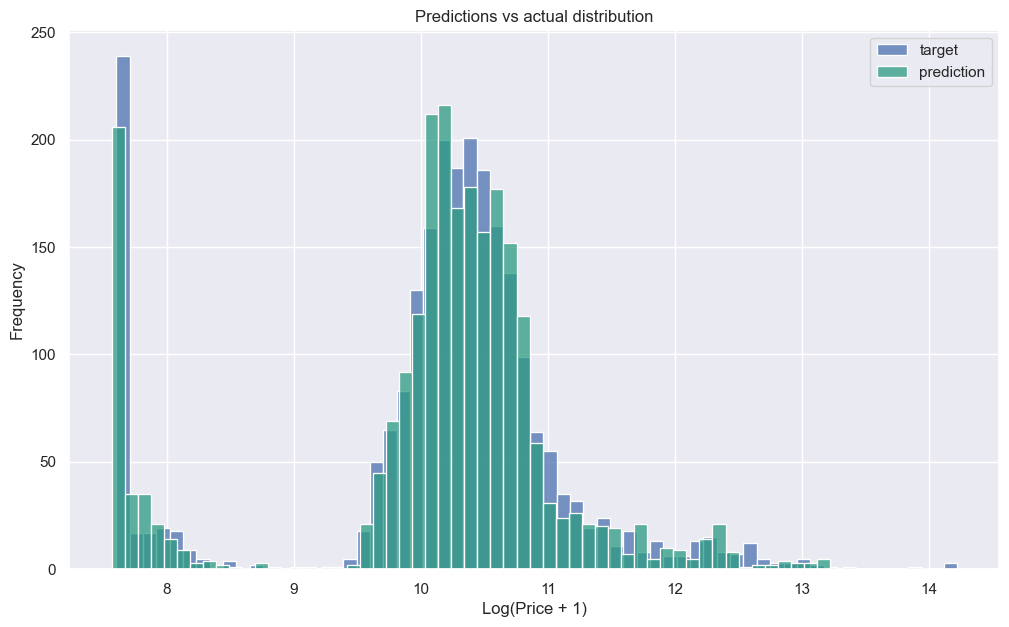

In [120]:
plt.figure(figsize=(12, 7))


sns.histplot(y_test, label='target')
sns.histplot(y_pred_xgb, label='prediction', color='#2C9B82')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# Gradient Boosting Regressor

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [122]:
y_pred_gbr = gbr_model.predict(X_test)
rmse_gbr, relative_rmse_gbr = evaluate_model(y_test, y_pred_gbr)
print(f"Test: RMSE: {rmse_gbr:.4f}, Relative RMSE: {relative_rmse_gbr:.2f}%")

Test: RMSE: 0.1487, Relative RMSE: 1.47%


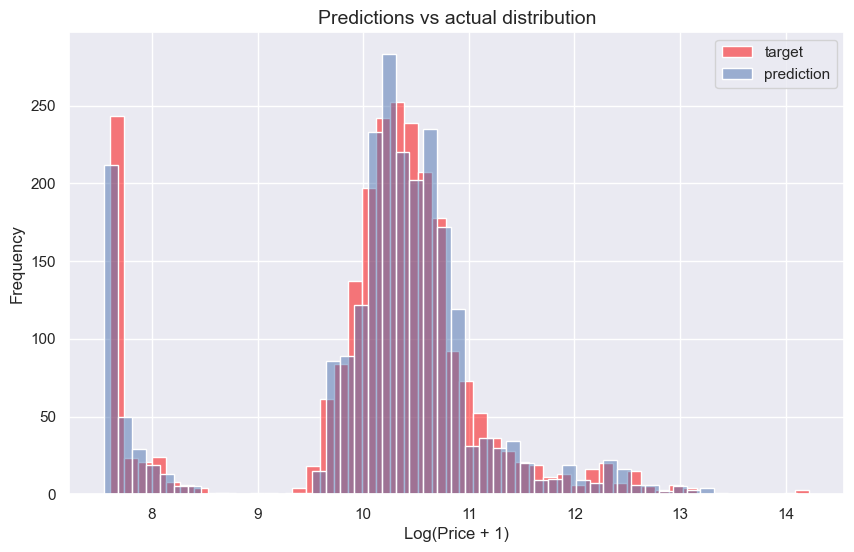

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='target', bins=50, alpha=0.5, color='red')
sns.histplot(y_pred_gbr, label='prediction', bins=50, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.title('Predictions vs actual distribution', fontsize=14)
plt.legend()
plt.show() 

# Support Vector Regression (SVR)

In [124]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=100)

In [125]:
y_pred_svr = svr_model.predict(X_test_scaled)
rmse_svr, relative_rmse_svr = evaluate_model(y_test, y_pred_svr)
print(f"Test: RMSE: {rmse_svr:.4f}, Relative RMSE: {relative_rmse_svr:.2f}%")

Test: RMSE: 0.2458, Relative RMSE: 2.43%


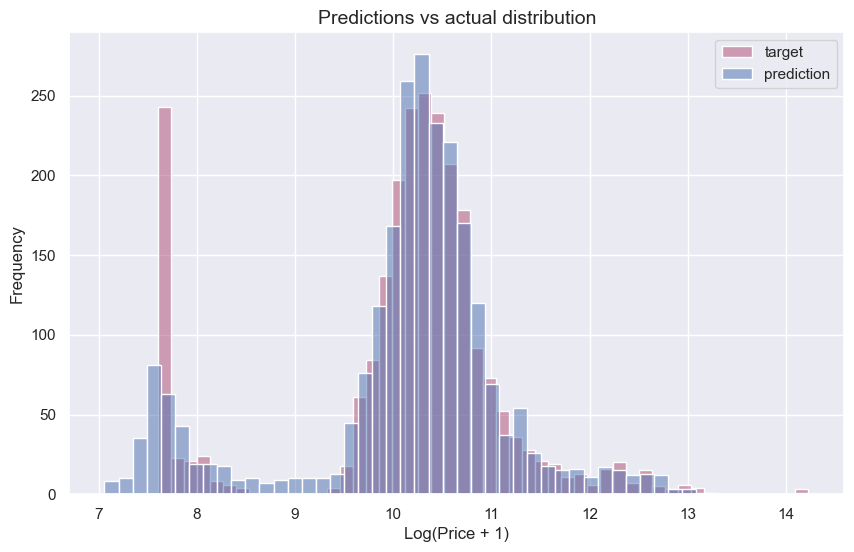

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='target', bins=50, alpha=0.5, color='#B04C72')
sns.histplot(y_pred_svr, label='prediction', bins=50, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.title('Predictions vs actual distribution', fontsize=14)
plt.legend()
plt.show() 

# K-Nearest Neighbors Regressor (KNN)

In [130]:
from sklearn.neighbors import KNeighborsRegressor

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [131]:
y_pred_knn = knn_model.predict(X_test)
rmse_knn, relative_rmse_knn = evaluate_model(y_test, y_pred_knn)
print(f"Test: RMSE: {rmse_knn:.4f}, Relative RMSE: {relative_rmse_knn:.2f}%")

Test: RMSE: 0.3065, Relative RMSE: 3.03%


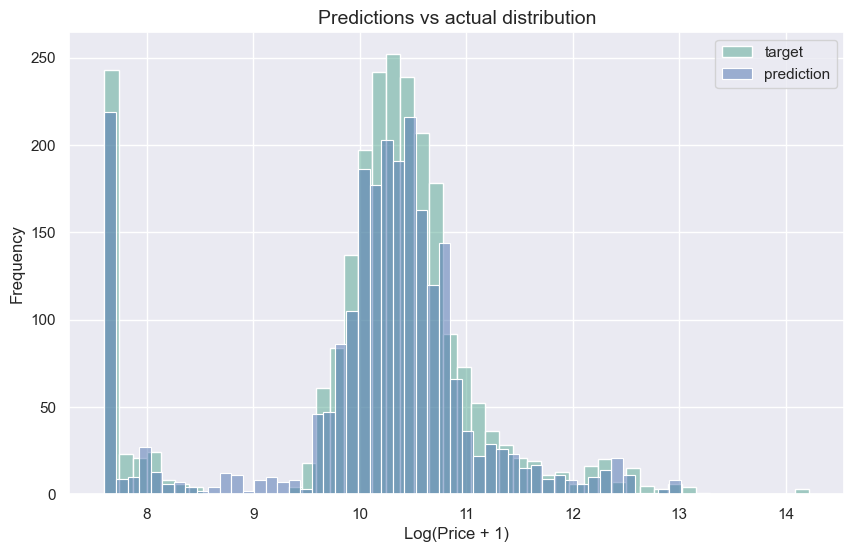

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='target', bins=50, alpha=0.5, color='#55A892')
sns.histplot(y_pred_knn, label='prediction', bins=50, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.title('Predictions vs actual distribution', fontsize=14)
plt.legend()
plt.show() 

# CatBoost Regressor

In [133]:
from catboost import CatBoostRegressor

# Train a CatBoost model
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, verbose=False)
catboost_model.fit(X_train, y_train)

In [134]:
y_pred_catboost = catboost_model.predict(X_test)
rmse_catboost, relative_rmse_catboost = evaluate_model(y_test, y_pred_catboost)
print(f"Test: RMSE: {rmse_catboost:.4f}, Relative RMSE: {relative_rmse_catboost:.2f}%")

Test: RMSE: 0.1638, Relative RMSE: 1.62%


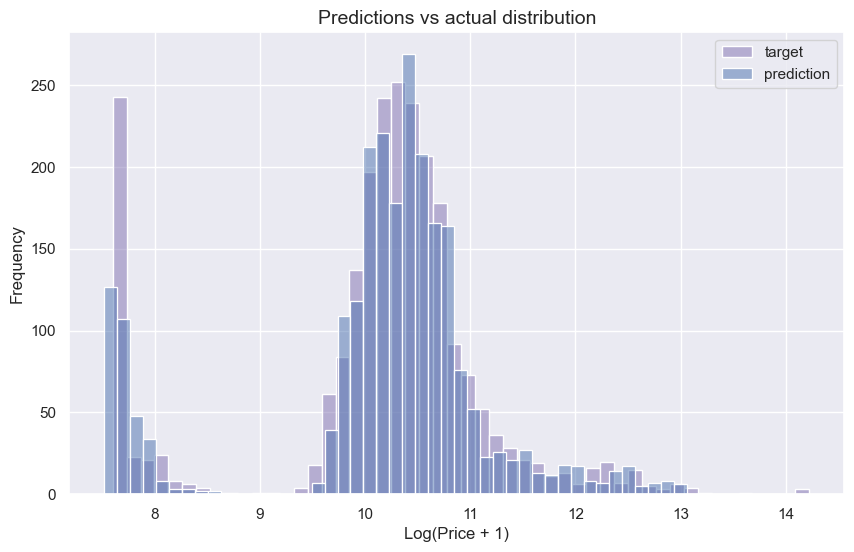

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='target', bins=50, alpha=0.5, color='#8172B2')
sns.histplot(y_pred_catboost, label='prediction', bins=50, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.title('Predictions vs actual distribution', fontsize=14)
plt.legend()
plt.show() 

# Neural Network (MLP Regressor)

In [162]:
from sklearn.neural_network import MLPRegressor

# Train an MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)

In [163]:
y_pred_mlp = mlp_model.predict(X_test)
rmse_mlp, relative_rmse_mlp = evaluate_model(y_test, y_pred_mlp)
print(f"Test: RMSE: {rmse_mlp:.4f}, Relative RMSE: {relative_rmse_mlp:.2f}%")

Test: RMSE: 0.3407, Relative RMSE: 3.37%


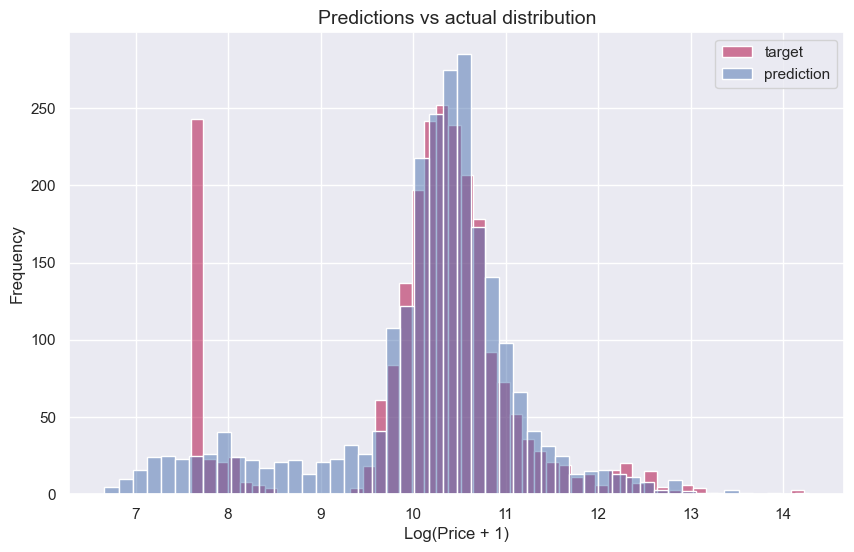

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='target', bins=50, alpha=0.5, color='#AF003C')
sns.histplot(y_pred_mlp, label='prediction', bins=50, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.title('Predictions vs actual distribution', fontsize=14)
plt.legend()
plt.show() 

# Model Selection: A Comparative Analysis

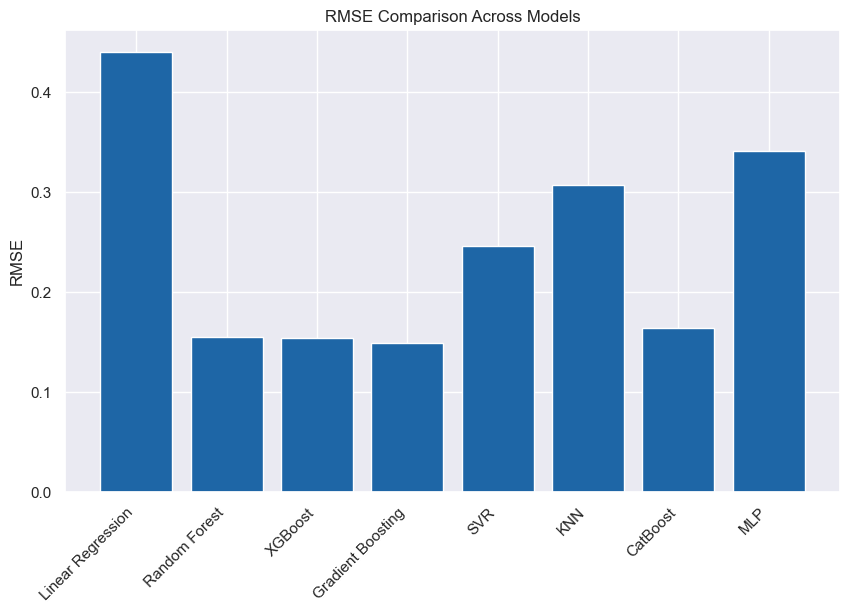

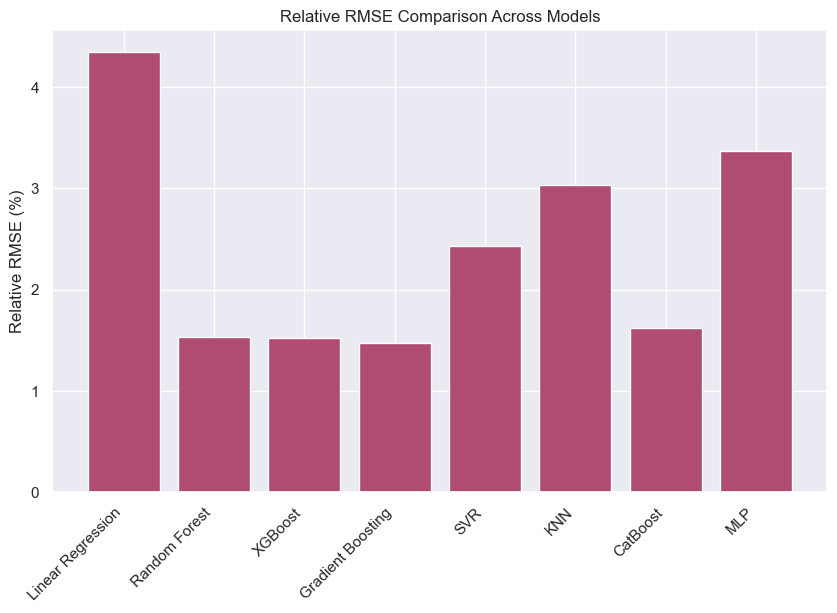

In [165]:
# Example data (replace with actual values)
model_names = ['Linear Regression', 'Random Forest', 'XGBoost',
               'Gradient Boosting', 'SVR', 'KNN', 'CatBoost', 'MLP']
rmses = [rmse_lr, rmse_rf, rmse_xgb, rmse_gbr, rmse_svr, rmse_knn, rmse_catboost, rmse_mlp]
relative_rmses = [relative_rmse_lr, relative_rmse_rf, relative_rmse_xgb, relative_rmse_gbr, relative_rmse_svr, relative_rmse_knn, relative_rmse_catboost, relative_rmse_mlp]

# Bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmses, color='#1E66A6')
plt.xticks(rotation=45, ha='right')
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.show()

# Bar chart for Relative RMSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, relative_rmses, color='#B04C72')
plt.xticks(rotation=45, ha='right')
plt.title('Relative RMSE Comparison Across Models')
plt.ylabel('Relative RMSE (%)')
plt.show()

# Best Model Selection

In [166]:
best_rmse = min(rmses)
best_model_index = rmses.index(best_rmse)

print('The best model performance:', model_names[best_model_index])
print(f"RMSE: {rmses[best_model_index]:.4f}")
print(f"Relative RMSE: {relative_rmses[best_model_index]:.2f}%")

The best model performance: Gradient Boosting
RMSE: 0.1487
Relative RMSE: 1.47%


### Car Price Prediction: Testing the Model

In [167]:
def predict_price(car_data, model):
    X_test = prepare_X(pd.DataFrame([car_data]))

    # Predict price (log scale)
    predicted_log_price = model.predict(X_test)[0]
    # Convert log price to actual price
    predicted_price = np.exp(predicted_log_price)

    return predicted_price

# Select a car from test dataset
i = 7  
car_info = data_test.iloc[i].to_dict()
print(f"Car information:\n{car_info}\n")

# Predict the price using the Gradient Boosting Regressor
predicted_price = predict_price(car_info, gbr_model)
print(f"Predicted price for the car: ${predicted_price:.2f}")

actual_price = np.exp(data_test.iloc[i]['log_price'])
print(f"Actual price for the car: ${actual_price:.2f}")

Car information:
{'make': 'bmw', 'model': '6_series', 'year': 2015, 'engine_fuel_type': 'premium_unleaded_(required)', 'engine_hp': 315.0, 'engine_cylinders': 6.0, 'transmission_type': 'automatic', 'driven_wheels': 'rear_wheel_drive', 'number_of_doors': 2.0, 'market_category': 'luxury,performance', 'vehicle_size': 'midsize', 'vehicle_style': 'coupe', 'highway_mpg': 32, 'city_mpg': 21, 'popularity': 3916, 'price': 76100, 'log_price': 11.239816684367907}

Predicted price for the car: $89727.16
Actual price for the car: $76101.00


## Hyperparameter Tuning with GridSearchCV

#### This section performs hyperparameter tuning to explore whether adjustmentsto the model's parameters can improve performance.
#### If tuning yields better results, the tuned model will be used; otherwise, the original model is retained.

In [457]:
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best parameters: {grid_search.best_params_}")
best_gbr_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_gbr_model.predict(X_test)
rmse_best, relative_rmse_best = evaluate_model(y_test, y_pred_best)
print(f"Tuned Model: RMSE: {rmse_best:.4f}, Relative RMSE: {relative_rmse_best:.2f}%")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Model: RMSE: 0.1551, Relative RMSE: 1.53%
